# Lecture 11 - Data Cleaning and Missing Data

![https://imgs.xkcd.com/comics/every_data_table.png](https://imgs.xkcd.com/comics/every_data_table.png)

#### Announcements:
* Week 2 survey takeaways:
  * Class going well, generally (sometimes rushed at the end, sorry)
  * Lab 2 was challenging! Note to self: these are 1-week labs, not 2-week projects.

#### Goals:
* Be prepared for common issues that need to be handled before analyzing:
   * Data types and units
   * Outliers
   * Missing Data

In [14]:
import pandas as pd
survey_results = pd.read_csv("~/311/students/lab2_hours/Week 2 Survey Survey Student Analysis Report.csv")
hrs = survey_results.iloc[:,8]

In [15]:
hrs.describe()

count    35.000000
mean     11.328571
std       8.682253
min       2.000000
25%       5.000000
50%       8.000000
75%      15.000000
max      42.000000
Name: 28088758: Approximately how many hours did you spend on the lab?, dtype: float64

<AxesSubplot:ylabel='Frequency'>

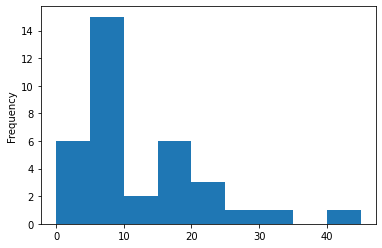

In [13]:
survey_results.iloc[:,8].plot.hist(bins=range(0,50,5))

# Rule #1 of Data Science: GIGO

> *On two occasions I have been asked, "Pray, Mr. Babbage, if you put into the machine wrong figures, will the right answers come out?" ... I am not able rightly to apprehend the kind of confusion of ideas that could provoke such a question.*
>
> — Charles Babbage, Passages from the Life of a Philosopher

### Lab 3: What real-data problems have you encountered so far in lab 3?
Or, in this course so far?

Ideas from the class:
* prices in excel files: cols/rows mismatched?
* finding documentation is hard/incomplete/cursory (sometimes)
* finding data is hard
* incomplete data - missing numbers? confounding factors?
* data is tentative / not all collected yet?
* lab2 - a column is simply missing
* data type inconsistency
* conflicting observations / nonsense
* "s" on numbers
* "T"s meaning traces
* datetimes
* negative cab fares in taxi data

What do we need to watch out for when approaching a new dataset?
* Data types and units
    * Kilograms vs pounds
    * scientific notation vs decimal
    * USD vs CHF
* Outliers
    * Summary stats and histograms are helpful in finding them
    * Missing data strategies for dealing with them if they're not real
    * Beware - not all outliers are artifacts! Know your distribution (cf. tomorrow's class)

* Unification and general apples-to-apples issues
    * Money - inflation, economic context
    * Time zones
    * Multiple data sources - name differences (Wehrwein, S. vs Scott Wehrwein)


A potentially insidious example: In the LCD data, there are two types of Hourly reports: FM-15 and FM-16. The latter appears to be taken more frequently than hourly, only when aviators need more frequent updates due to some interesting weather. What might this mean for if:
* you investigate how often thunderstorms happen by counting hourly measurements with thunderstorms in the weather column?
* you compare average wind speeds in two cities, one of which has very gusty (i.e., variable) winds often, while the other has high sustained winds more often?

What would you do here?
LCD Weather data:
* traces when counting total precip
* traces when counting total days it rained
* nans in daily columns when looking at hourly values
* an hourly observation for temperature that simply wasn't taken

NHANES or similar survey:
* <2 year olds are missing standing height; what is the average height of the entire population?
* Year of Death for living people when trying to 
* Left-handed vs right-handedness column is missing for .1% of entries in the dataset

Assignment survey:
* hours spent column for first assignment survey says 90

Avengers:
* a handful of avengers joined in 1900


What general strategies can we extract from the above?
Suggestions from the class:
* filling in the mean
* dump random data in
* drop rows
* find other data/columns that have the answers
* heuristics (last film - first film for career films)

What strategies for handling missing data can we extract from the above (and some others that may not have come up)?
* Heuristics (birth + life expectancy for Year of Death)
* Mean value (fill in the average)
* Random value (fill in garbage)
* Nearest Neighbor (in time, or most-similar datapoint)
* Interpolation (e.g., average of temperature before and after)